# Housing Example

## imports

In [1]:
import tarfile
import urllib.request
from pathlib import Path

import polars as pl
# import matplotlib as plt

## Functions

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pl.read_csv(Path("datasets/housing/housing.csv"))

## Data

In [3]:
housing = load_housing_data()

housing.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


In [4]:
housing.glimpse()

Rows: 20640
Columns: 10
$ longitude          <f64> -122.23, -122.22, -122.24, -122.25, -122.25, -122.25, -122.25, -122.25, -122.26, -122.25
$ latitude           <f64> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84
$ housing_median_age <f64> 41.0, 21.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 42.0, 52.0
$ total_rooms        <f64> 880.0, 7099.0, 1467.0, 1274.0, 1627.0, 919.0, 2535.0, 3104.0, 2555.0, 3549.0
$ total_bedrooms     <f64> 129.0, 1106.0, 190.0, 235.0, 280.0, 213.0, 489.0, 687.0, 665.0, 707.0
$ population         <f64> 322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 1094.0, 1157.0, 1206.0, 1551.0
$ households         <f64> 126.0, 1138.0, 177.0, 219.0, 259.0, 193.0, 514.0, 647.0, 595.0, 714.0
$ median_income      <f64> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912
$ median_house_value <f64> 452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0
$ ocean_proximity    <str> 'NEAR BAY', 'NEAR BAY'

In [5]:
housing.describe()

statistic,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0,"""20640"""
"""null_count""",0.0,0.0,0.0,0.0,207.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.53968,3.870671,206855.816909,null
"""std""",2.003532,2.135952,12.585558,2181.615252,421.38507,1132.462122,382.329753,1.899822,115395.615874,null
"""min""",-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,"""<1H OCEAN"""
"""25%""",-121.8,33.93,18.0,1448.0,296.0,787.0,280.0,2.5637,119600.0,null
"""50%""",-118.49,34.26,29.0,2127.0,435.0,1166.0,409.0,3.5349,179700.0,null
"""75%""",-118.01,37.71,37.0,3148.0,647.0,1725.0,605.0,4.7431,264700.0,null
"""max""",-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,"""NEAR OCEAN"""


In [6]:
housing.group_by(pl.col("ocean_proximity")).len("n").sort("n", descending=True)

ocean_proximity,n
str,u32
"""<1H OCEAN""",9136
"""INLAND""",6551
"""NEAR OCEAN""",2658
"""NEAR BAY""",2290
"""ISLAND""",5


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

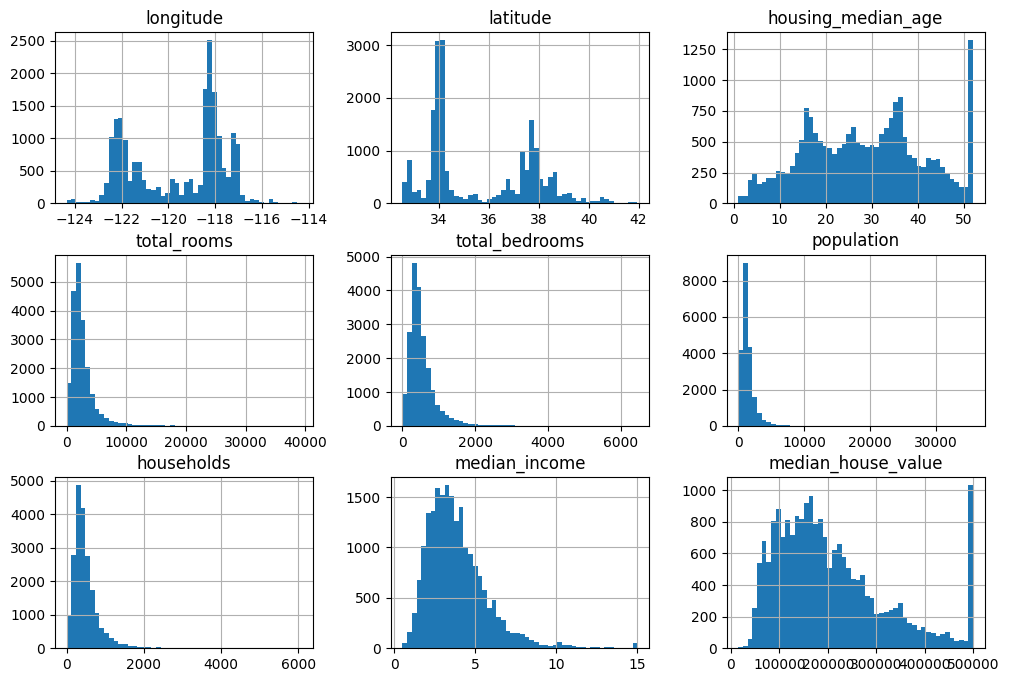

In [7]:
housing.to_pandas().hist(bins=50, figsize=(12, 8))

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
train_set, test_set = train_test_split(housing, test_size =0.2,   random_state=42)

In [10]:
breaks=[1.5, 3.0, 4.5, 6]
labels = ["1","2","3","4","5"]

housing = (
    housing.with_columns(
        pl.col("median_income")
        .cut(breaks=breaks, labels=labels)
        .alias("income_cat")
    )
)


In [13]:
housing.select(pl.col("income_cat")).group_by(pl.col("income_cat")).len().sort(pl.col("income_cat")).plot.bar(
    x="income_cat", y = "len"
)

alt.Chart(...)

In [15]:
strat_train_set, strat_test_set = train_test_split(
    housing, 
    test_size=0.2, 
    stratify=housing.select("income_cat"), 
    random_state =42
)

In [35]:
length = len(strat_test_set)
(
    strat_test_set
    .group_by("income_cat")
    .len()
    .with_columns(
        pl.col("len").truediv(length).alias("prop")
    )
    .sort("income_cat")
)


income_cat,len,prop
cat,u32,f64
"""1""",165,0.039971
"""2""",1316,0.318798
"""3""",1447,0.350533
"""4""",728,0.176357
"""5""",472,0.114341


polars.dataframe.frame.DataFrame

In [40]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop_in_place("income_cat")

## Exploring the Data

In [45]:
housing = strat_train_set
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,"""NEAR BAY"""
-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,"""<1H OCEAN"""
-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,101700.0,"""INLAND"""
-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,"""INLAND"""
-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,"""NEAR OCEAN"""
…,…,…,…,…,…,…,…,…,…
-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,"""<1H OCEAN"""
-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,"""INLAND"""
-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,"""NEAR OCEAN"""


In [ ]:
chart = (
    housing
    .sample(5000)
    .plot
    .point(
        x="longitude",
        y="latitude",
    )
)
chart

alt.Chart(...)